#ЛР №6

Основные понятия ООП. Инкапсуляция. Классы. Декораторы.

##Основная задача "Эксперимент"

Нужно написать класс "Эксперимент", который производит работу с данными.

Вы получили данные в виде словаря. Словарь имеет следующую структуру {'date': '2023-01-05', 'signal': 'path_to_ecg_signal', 'parameters':{}}

**Интерфейс**

Нужно написать класс, где должны поддерживаться следующие методы:

* _конструктор_ — принимает словарь и создает соответствующие поля (self.data, self.path_signal, self.parameters)
* `get_datе()` — возвращает дату записи сигнала.
* `get_signal_length()` — возвращает длину сигнала.
* `plot_signal()` — выводит график сигнала.
* `_signal_filtration(signal, filtration_parametres)` — производит фильтрацию сигнала.
* `_signal_find_peaks(signal, find_peaks_parametres)` — находит точки максимума сигнала и возвращает их в виде списка.
* `_calculate_RR_intervals()` — производит расчет длительности RR интервалов и возвращает длины RR интервалов в виде списка.
В этом методе вызываются методы _signal_filtration и _signal_find_peak.
* `get_RR_statistics()` — возвращает статистические характеристики RR интервалов на записи ECG - среднее, std, min, max (в виде словаря).
В этом методе вызывается метод _calculate_RR_intervals.


*можно добавить свои методы






In [70]:
$git init

SyntaxError: invalid syntax (2275228585.py, line 1)

In [14]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
!pip install wfdb
import wfdb
!pip install heartpy
import heartpy as hp
from scipy.signal import find_peaks

   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
    --------------------------------------- 0.0/1.0 MB 320.0 kB/s eta 0:00:04
   -- ------------------------------------- 0.1/1.0 MB 465.5 kB/s eta 0:00:03
   ------- -------------------------------- 0.2/1.0 MB 1.3 MB/s eta 0:00:01
   ------------------------- -------------- 0.6/1.0 MB 3.1 MB/s eta 0:00:01
   ---------------------------------------  1.0/1.0 MB 4.5 MB/s eta 0:00:01
   ---------------------------------------- 1.0/1.0 MB 4.0 MB/s eta 0:00:00


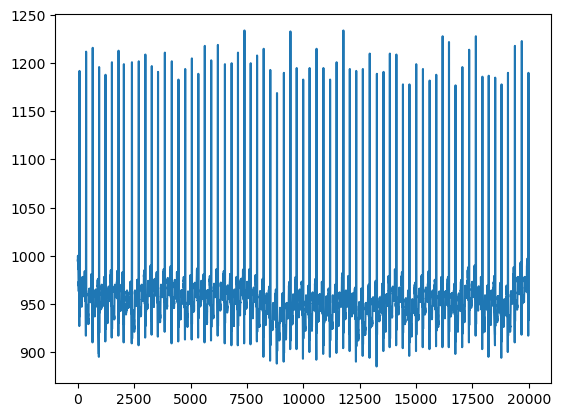

In [62]:
df = pd.read_csv('/Users/iljen/Downloads/ecg.csv')
plt.plot(df['MLII'])
plt.show()

Дата записи сигнала: 2023-01-05
Длина сигнала: 20000


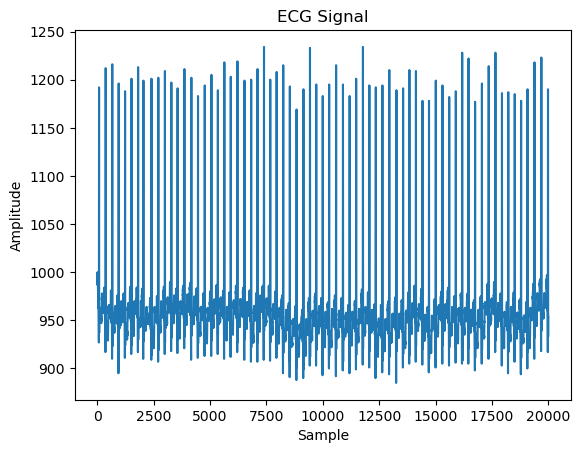

Статистика RR интервалов: {'mean': 289, 'std': 31, 'min': 66, 'max': 358}


In [68]:
class experiment:
    def __init__(self, data):
        self.data = data
        self.path_signal = data['signal']
        self.parameters = data['parameters']
        self.signal = self.load_signal()

    def load_signal(self):
        df = pd.read_csv(self.path_signal)
        return df['MLII'].values

    def get_date(self):
        return self.data['date']

    def get_signal_length(self):
        return len(self.signal)

    def plot_signal(self):
        plt.plot(self.signal)
        plt.title("ECG Signal")
        plt.xlabel("Sample")
        plt.ylabel("Amplitude")
        plt.show()

    def _signal_filtration(self, filtration_parameters=None):
        if filtration_parameters is None:
            filtration_parameters = {'cutoff': [0.75, 3.5], 'sample_rate': 100, 'order': 3, 'filtertype': 'bandpass'  }

        filtered_signal = hp.filter_signal(self.signal, 
                                            cutoff=filtration_parameters['cutoff'], 
                                            sample_rate=filtration_parameters['sample_rate'], 
                                            order=filtration_parameters['order'], 
                                            filtertype=filtration_parameters['filtertype'])
        return filtered_signal

    def _signal_find_peaks(self, signal, find_peaks_parameters=None):
        if find_peaks_parameters is None:
            find_peaks_parameters = {'height': 20}
            
        peaks, _ = find_peaks(signal, **find_peaks_parameters)
        return peaks

    def _calculate_RR_intervals(self):
        filtered_signal = self._signal_filtration()
        peaks = self._signal_find_peaks(filtered_signal)
        rr_intervals = np.diff(peaks)
        return rr_intervals

    def get_RR_statistics(self):
        rr_intervals = self._calculate_RR_intervals()
        return {
            'mean': round(np.mean(rr_intervals)),
            'std': round(np.std(rr_intervals)),
            'min': round(np.min(rr_intervals)),
            'max': round(np.max(rr_intervals))
        }

data = {
    'date': '2023-01-05',
    'signal': '/Users/iljen/Downloads/ecg.csv',
    'parameters': {}
}

experiment = exp(data)
print("Дата записи сигнала:", experiment.get_date())
print("Длина сигнала:", experiment.get_signal_length())
experiment.plot_signal()
print("Статистика RR интервалов:", experiment.get_RR_statistics())

Файл с ЭКГ сигналом (ecg.csv) в папке